In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("FuelEfficiency.csv")
data.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [3]:
data.describe()

,Eng Displ,Cylinders,CityMPG,HwyMPG,CombMPG,# Gears
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.092061,5.493036,20.442897,27.760446,23.139276,7.147632
std,1.344572,1.752251,5.298504,5.607924,5.368443,1.507929
min,1.400000,3.000000,9.000000,14.000000,11.000000,1.000000
25%,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000
50%,3.000000,6.000000,20.000000,27.000000,23.000000,7.000000
75%,3.600000,6.000000,23.000000,31.000000,26.000000,8.000000
max,8.000000,16.000000,57.000000,59.000000,58.000000,10.000000


In [4]:
meanMPG=data['CombMPG'].mean()
data['FuelEfficient']=(data['CombMPG']>meanMPG).astype(int)

In [5]:
data['FuelEfficient'].head()

0    0
1    0
2    0
3    0
4    0
Name: FuelEfficient, dtype: int32

In [6]:
all_labels = set()
for labels_str in data['Transmission']:
    labels1 = labels_str.split('(')[0]
    data['TransClass']=labels1
    all_labels.add(labels1)
print(all_labels)
    


{'Manual', 'Auto'}


In [7]:
d1={'Manual':0,'Auto':1}
data['TransClass']=data['TransClass'].map(d1)


In [8]:
Ed_bins=np.arange(1,11,2)
Ed_bins_labels=list(range(len(Ed_bins)-1))
data['EngDisp_bins']=pd.cut(data['Eng Displ'],bins=Ed_bins,labels=Ed_bins_labels,right=False)

In [9]:
Cylin_bins=np.arange(0,24,4)
Cylin_bins_labels=list(range(len(Cylin_bins)-1))
data['Cylin_bins']=pd.cut(data['Cylinders'],bins=Cylin_bins,labels=Cylin_bins_labels,right=False)

In [10]:
Gear_bins=np.arange(0,15,3)
Gear_bins_labels=list(range(len(Gear_bins)-1))
data['Gear_bins']=pd.cut(data['# Gears'],bins=Gear_bins,labels=Gear_bins_labels,right=False)

In [11]:
category_cols=['Gear_bins','EngDisp_bins','Cylin_bins']
data[category_cols]=data[category_cols].astype(int)
#print(data.dtypes)

In [12]:
data.isnull().sum()

Mfr Name         0
Carline          0
Eng Displ        0
Cylinders        0
Transmission     0
CityMPG          0
HwyMPG           0
CombMPG          0
# Gears          0
FuelEfficient    0
TransClass       0
EngDisp_bins     0
Cylin_bins       0
Gear_bins        0
dtype: int64

In [13]:
features=['Eng Displ','Cylinders','# Gears']
X=np.array(data[features])
y=np.array(data['FuelEfficient'])

In [14]:
from sklearn.decomposition import PCA
pca_fuel=PCA(n_components=2).fit(X)
X_pca=pca_fuel.transform(X)
print(pca_fuel.components_)

[[ 0.58202311  0.77047929  0.26002069]
 [ 0.14116554  0.21917212 -0.96542005]]


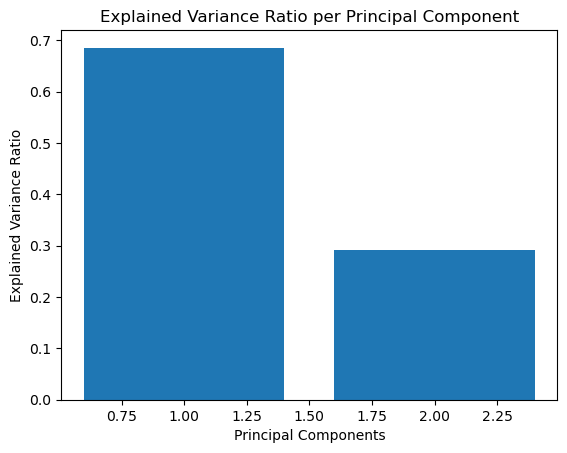

Information We managed to preserve : 0.9771481587449767


In [25]:
explained_variance_ratio=pca_fuel.explained_variance_ratio_
plt.bar(range(1,3),explained_variance_ratio)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()
print("Information We managed to preserve :", sum(explained_variance_ratio) )

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.3,random_state=42)

In [16]:
'''
for i in range(len(features)):
    for j in range (i+1,len(features)):
        plt.figure(figsize=(5,5))
        plt.scatter(x_train[:,i],x_train[:,j],c=y_train)
        plt.show()
'''

'\nfor i in range(len(features)):\n    for j in range (i+1,len(features)):\n        plt.figure(figsize=(5,5))\n        plt.scatter(x_train[:,i],x_train[:,j],c=y_train)\n        plt.show()\n'

In [17]:
import pylab 
from sklearn.preprocessing import MinMaxScaler 


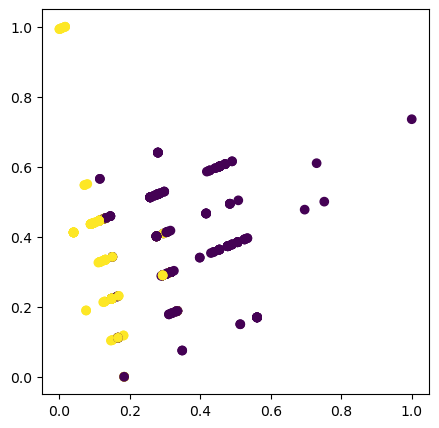

In [28]:
scaling = MinMaxScaler(feature_range=(0,1)).fit(x_train)
x_train = scaling.transform(x_train)

plt.figure(figsize=(5,5))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [30]:

from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
model = svm.SVC()


In [20]:

scaling = MinMaxScaler(feature_range=(0,1)).fit(x_test)
x_test = scaling.transform(x_test)
y_pred=svc.predict(x_test)
print(y_pred)


[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0]


To plot the contour of SVC 

In [29]:
#creating meshgrid for the sample input and taking feature 1 and 2 as input to meshgrid
x_min,x_max = x_test[:,0].min() - 1, x_test[:,0].max() + 1
y_min,y_max = x_test[:,1].min() - 1, x_test[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


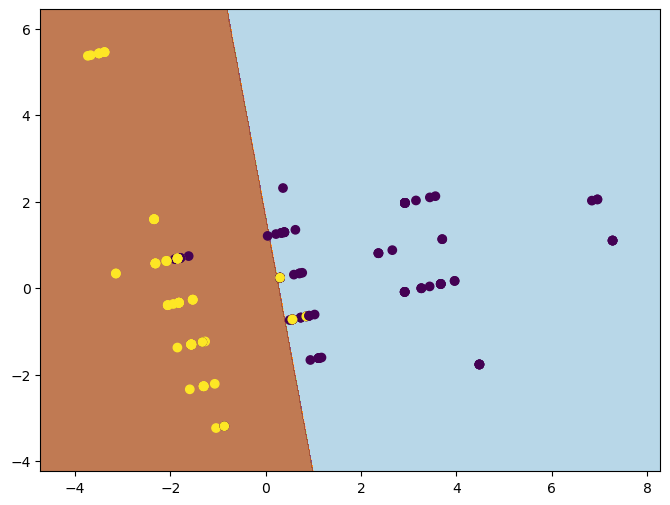

In [32]:
#creating samplepoints to fit into the SVC 
sample_points=np.c_[xx.ravel(),yy.ravel()]
#classifying the meshgrid sample points as input 
Z=svc.predict(sample_points)
Z=Z.reshape(xx.shape)
#creating the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score


In [34]:
accuracy_score(y_test,y_pred)

0.8796296296296297